In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
resenha = pd.read_csv("data/imdb-reviews-pt-br.csv")

In [3]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state=42)

In [5]:
# regressao_logistica = LogisticRegression()
# regressao_logistica.fit(treino, classe_treino)
# acuracia = regressao_logistica.score(teste, classe_teste)

In [6]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [7]:
resenha["classificacao"] = classificacao

In [8]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [9]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)

# bag_of_words.toarray()
# vetorizar.get_feature_names()

In [10]:
matriz_esparsa = pd.SparseDataFrame(bag_of_words, columns=vetorizar.get_feature_names())

In [11]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,NaN,1,1.0
1,1,1,1.0,1,NaN


In [12]:
vetorizar = CountVectorizer(lowercase=False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

bag_of_words

<49459x50 sparse matrix of type '<class 'numpy.int64'>'
	with 1306687 stored elements in Compressed Sparse Row format>

In [13]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

0.6583097452486858

In [14]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
#     print(bag_of_words)
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=42)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
classificar_texto(resenha, "text_pt", "classificacao")


    

0.6583097452486858

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])

In [17]:
len(todas_palavras)

63448424

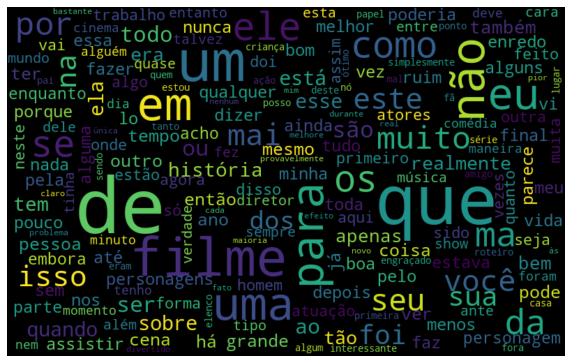

In [18]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# resenha.query("sentiment == 'pos'")

In [20]:
def nuvem_palavras(texto, coluna_texto, sentiment):  
    todas_palavras_s = texto.query("sentiment == '"+sentiment+"'")
    todas_palavras = ' '.join([texto for texto in todas_palavras_s[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    
    
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

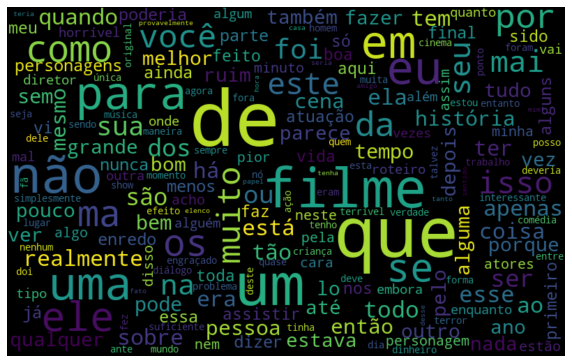

In [21]:
nuvem_palavras(resenha, "text_pt", "neg")

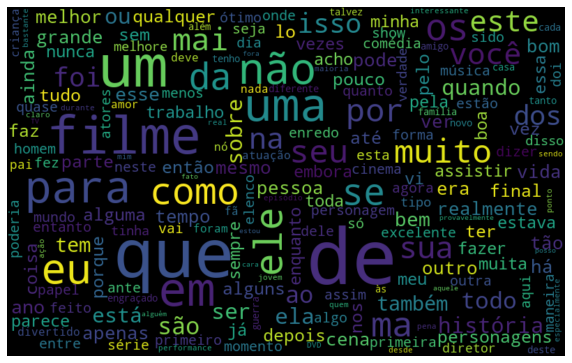

In [22]:
nuvem_palavras(resenha, "text_pt", "pos")

In [23]:
import nltk

In [24]:
# nltk.download("all")

In [25]:
a = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(a)
frequencia

FreqDist({'um filme ruim': 1, 'um filme bom': 1})

In [26]:
from nltk import tokenize

frase = "Bem vindo ao curso de PNL!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['Bem', 'vindo', 'ao', 'curso', 'de', 'PNL!']

In [27]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

df_frequencia = pd.DataFrame({"Palavras":list(frequencia.keys()), "Frequencia":list(frequencia.values())})

In [28]:
# df_frequencia.nlargest(columns="Frequencia", n=110)

In [29]:
import seaborn as sns

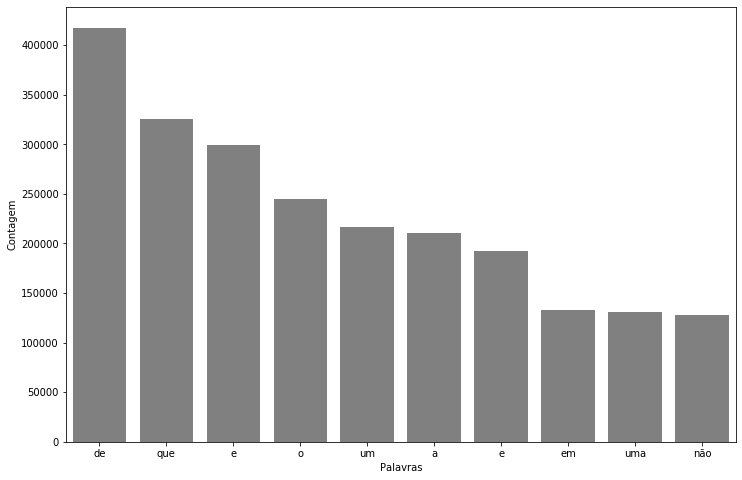

In [30]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_frequencia.nlargest(columns="Frequencia", n=10), x="Palavras", y="Frequencia", color='gray')
ax.set(ylabel="Contagem")
plt.show()

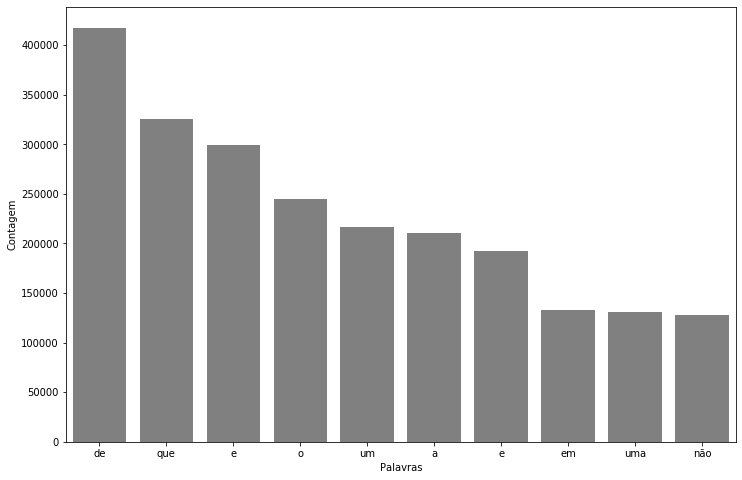

In [31]:
def pareto(texto_df, coluna_texto, qtde):
    todas_palavras = ' '.join([texto for texto in texto_df[coluna_texto]])
    
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavras":list(frequencia.keys()), "Frequencia":list(frequencia.values())})

    df_frequencia = df_frequencia.nlargest(columns="Frequencia", n=qtde)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data=df_frequencia, x="Palavras", y="Frequencia", color='gray')
    ax.set(ylabel="Contagem")
    plt.show()
    
pareto(resenha, "text_pt", 10)

In [32]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
# palavras_irrelevantes
frases_processadas = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavra_texto = token_espaco.tokenize(opiniao)
    for palavra in palavra_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frases_processadas.append(" ".join(nova_frase))
    
resenha['tratamento_1'] = frases_processadas

In [33]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


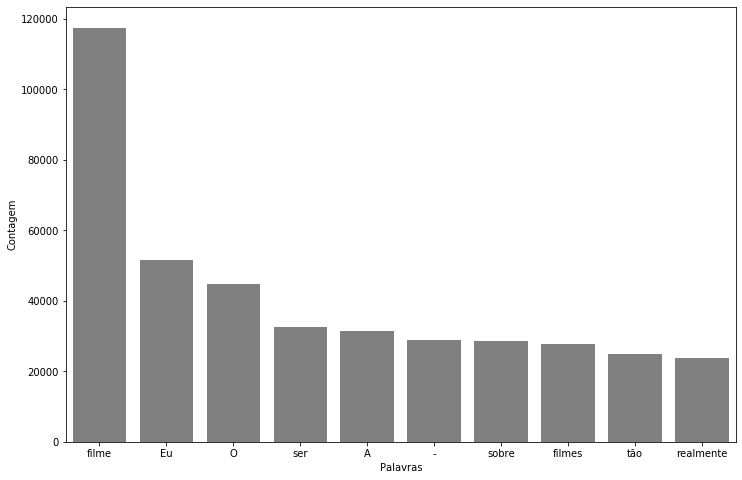

In [34]:
pareto(resenha, "tratamento_1", 10)

In [35]:
from string import punctuation

In [36]:
pontuacao = list(punctuation)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

token_pontuacao = tokenize.WordPunctTokenizer()

In [37]:
frase_processada = list()
for opiniao in resenha["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))
    
resenha['tratamento_2'] = frase_processada

# pontuacao_stopwords

In [38]:
resenha["tratamento_1"][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [39]:
resenha["tratamento_2"][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

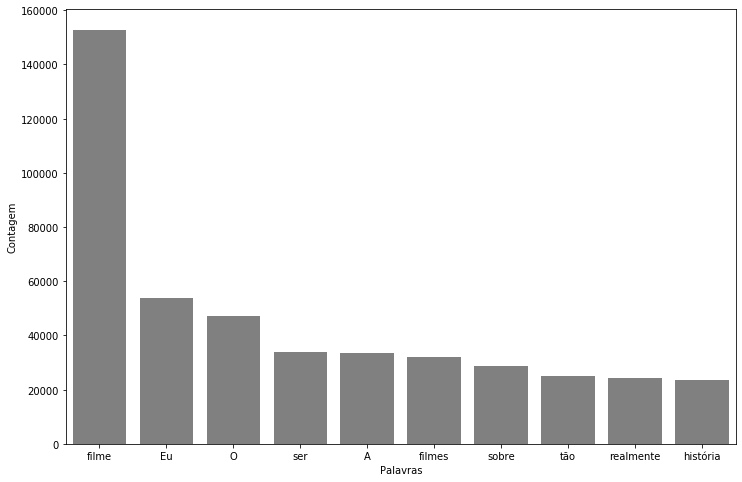

In [40]:
pareto(resenha, "tratamento_2", 10)

In [41]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha.tratamento_2]

In [42]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [43]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [44]:
# stopwords_sem_acento

In [45]:
resenha["tratamento_3"] = sem_acentos

In [46]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))
    
resenha['tratamento_3'] = frase_processada

In [53]:
# resenha['tratamento_3'].head()

In [48]:
acuracia_tratamento3 = classificar_texto(resenha, "tratamento_3", "classificacao")

In [49]:
acuracia_tratamento3

0.6810351799433886

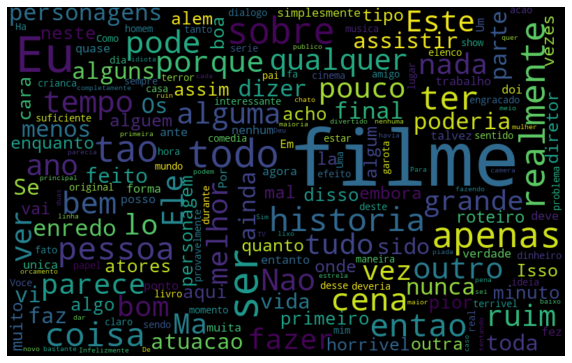

In [50]:
nuvem_palavras(resenha, "tratamento_3", "neg")

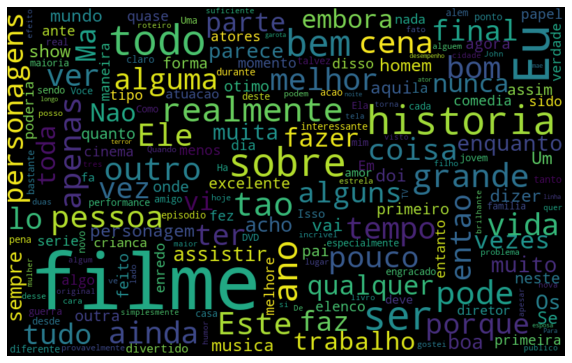

In [51]:
nuvem_palavras(resenha, "tratamento_3", "pos")

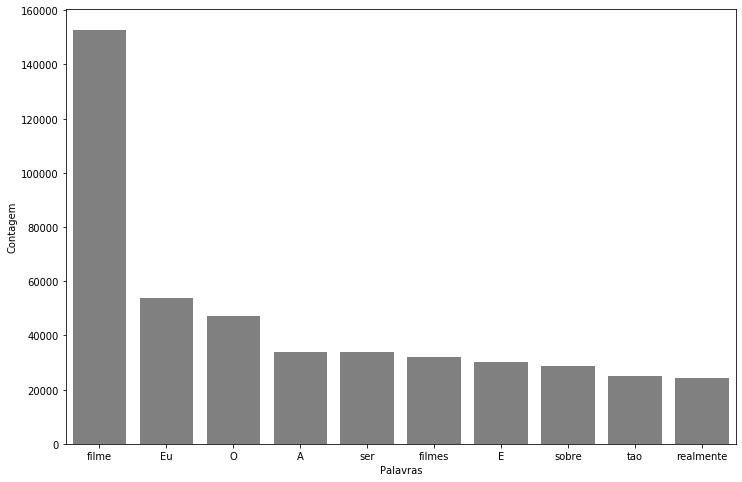

In [52]:
pareto(resenha, "tratamento_3", 10)

In [55]:
frase_processada = list()
for opiniao in resenha["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(" ".join(nova_frase))
    
resenha['tratamento_4'] = frase_processada

In [57]:
resenha['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [59]:
resenha['tratamento_4'][0]

'vez sr costner arrumou filme tempo necessario alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens maioria fantasmas armario personagem costers realizado logo inicio esquecido tarde importava personagem deveriamos importar arrogante superconfiante ashton kutcher problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado unico obstaculo parece estar vencendo costner finalmente bem alem meio caminho costner conta sobre fantasmas kutchers informados kutcher levado ser melhor pressentimentos pressagios anteriores nenhuma magica aqui tudo podia fazer desligar hora'

In [60]:
acuracia_tratamento4 = classificar_texto(resenha, "tratamento_4", "classificacao")

In [62]:
print(acuracia_tratamento3)
print(acuracia_tratamento4)

0.6810351799433886
0.6879094217549535


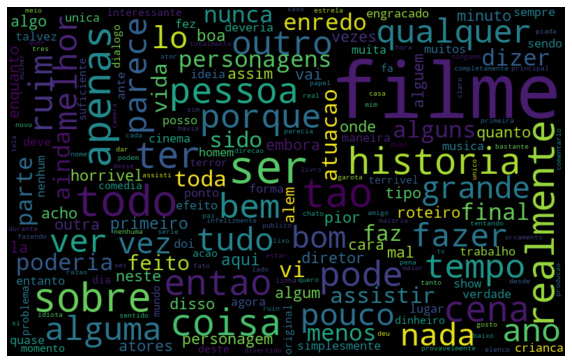

In [63]:
nuvem_palavras(resenha, "tratamento_4", "neg")

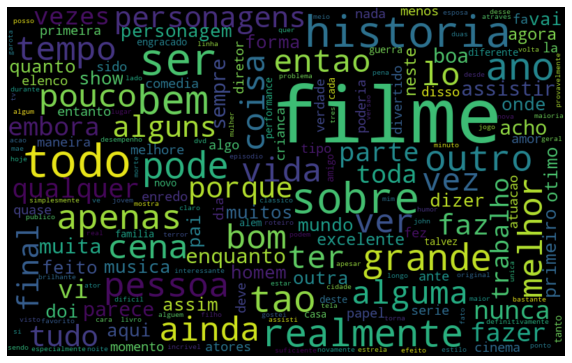

In [64]:
nuvem_palavras(resenha, "tratamento_4", "pos")

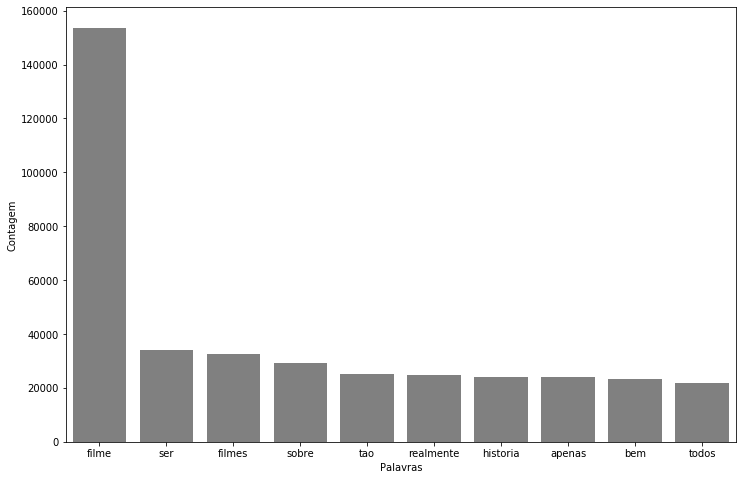

In [65]:
pareto(resenha, "tratamento_4", 10)

In [66]:
stemmer = nltk.RSLPStemmer()

In [67]:
stemmer.stem("corredor")

'corr'

In [68]:
frase_processada = list()
for opiniao in resenha["tratamento_4"]:
    nova_frase = list()
    
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(" ".join(nova_frase))
    
resenha['tratamento_5'] = frase_processada

In [70]:
acuracia_tratamento5 = classificar_texto(resenha, "tratamento_5", "classificacao")

print(acuracia_tratamento4)
print(acuracia_tratamento5)

0.6879094217549535
0.6943792964011323


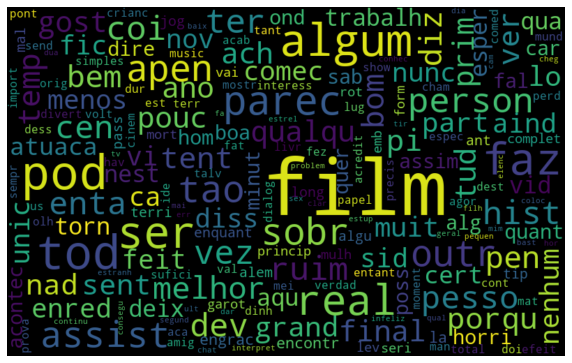

In [71]:
nuvem_palavras(resenha, "tratamento_5", "neg")

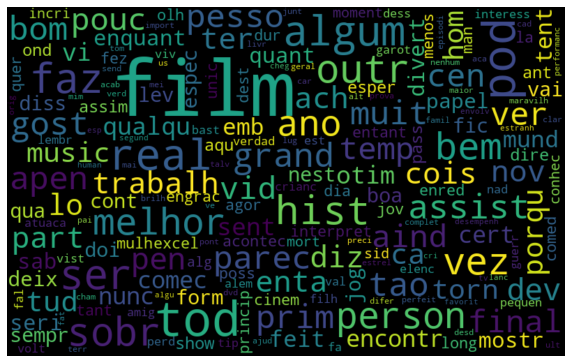

In [72]:
nuvem_palavras(resenha, "tratamento_5", "pos")

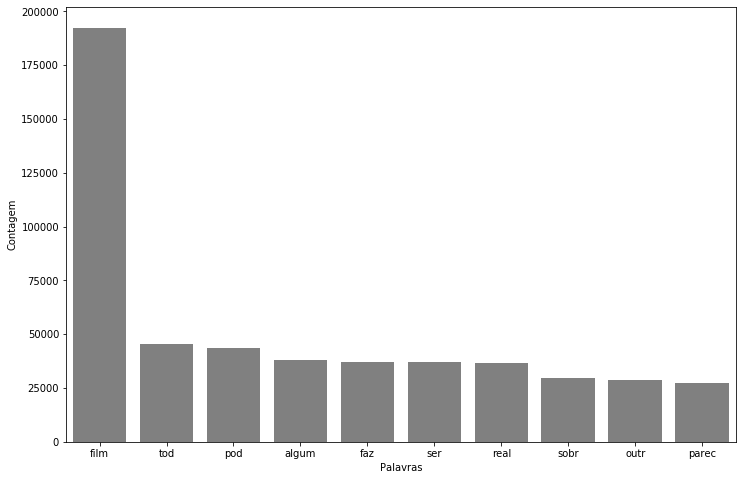

In [73]:
pareto(resenha, "tratamento_5", 10)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
frases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)

pd.DataFrame(caracteristicas.todense(), columns=tfidf.get_feature_names())

,Assiti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [87]:
tfidf_bruto = tfidf.fit_transform(resenha["text_pt"])


treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha.classificacao, random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto

0.6600889607763849

In [88]:
tfidf_tratados = tfidf.fit_transform(resenha["tratamento_5"])


treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha.classificacao, random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados

0.6988273352203801

In [94]:
from nltk import ngrams

frase = "Assisti um ótimo filme."
frase_separada = token_espaco.tokenize(frase)

pares = ngrams(frase_separada, 2)
list(pares)

[('Assisti', 'um'), ('um', 'ótimo'), ('ótimo', 'filme.')]

In [97]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha.classificacao, random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams


0.8858875859280226

In [98]:
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha["tratamento_5"])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha.classificacao, random_state=42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf


0.884270117266478

In [104]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf.get_feature_names())



In [117]:
# pesos.nlargest(100,0)
# pesos.nsmallest(10,0)

,0
otim,8.294252
excel,7.978754
perfeit,6.579013
favorit,5.778957
maravilh,5.286399
incri,5.050269
hilari,4.657536
divert,4.582659
ador,4.423153
brilh,4.268535
